In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [119]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def BCE(y, y1):
    m = y.shape[0]
    return (1/m)*np.sum(-(y*np.log(y1)+(1-y)*np.log(1-y1)))

def gradient_descent(X, y, weights, b, learning_rate, epochs):
    n_samples = y.shape[0]
    loss = []
    for e in range(epochs):
        # Calculate Z
        Z = np.dot(X, weights) + b          # n_samples dimensional array
        # Apply sigmoid
        y1 = sigmoid(Z)                     # n_samples dimensional array
        # Calculate partial derivatives
        dw = (1/n_samples)*np.dot(X.T, y1-y)
        db = (1/n_samples)*np.sum(y1-y)
        loss.append(BCE(y, y1))
        # Update weights
        weights -= learning_rate*dw
        b -= learning_rate*db
    return weights, b, loss

def predict(X, weights, b):
    return sigmoid(np.dot(X, weights)+b)

def find_accuracy(y, y1):
    return sum((y == (y1>=0.5).astype(int)))/y.shape[0]*100

In [123]:
n_samples = 100
n_features = 8
X, y = make_classification(n_samples, n_features, random_state=2)
weights = np.zeros(n_features)
b = 0
learning_rate = 0.1
epochs = 400
weights, b, loss = gradient_descent(X, y, weights, b, learning_rate, epochs)

In [124]:
y1 = predict(X, weights, b)
accuracy = find_accuracy(y, y1)
print(accuracy)

86.0


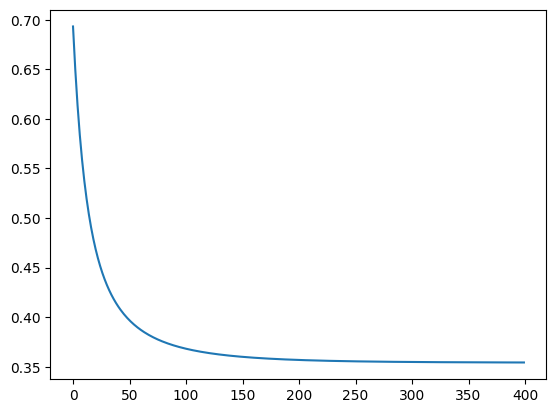

In [125]:
plt.plot(loss)

In [126]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)
clf.score(X, y)

0.86